# 2.5 関数の最適化

## 2.5.1 １変数関数の勾配法

In [ ]:
using PyPlot
using ForwardDiff

In [2]:
# 最大値を探したい目的関数
x_opt = 0.50
f(x) = -2(x - x_opt)^2

f (generic function with 1 method)

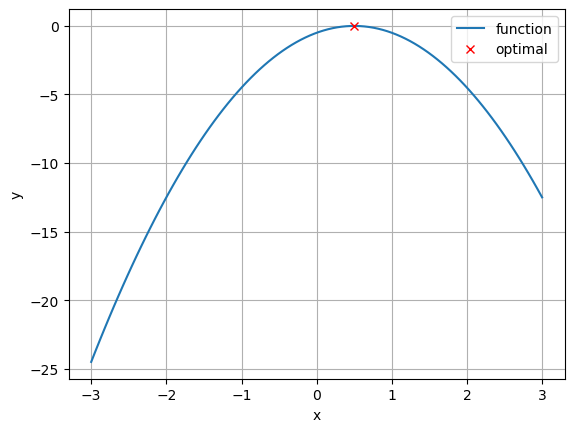

PyObject <matplotlib.legend.Legend object at 0x16fecac10>

In [3]:
fig, ax = subplots()
xs = range(-3,3,length=100)
ax.plot(xs, f.(xs), label="function")
ax.plot(x_opt, f(x_opt), "rx", label="optimal")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [4]:
# １変数関数の最適化
function gradient_method_1dim(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    
    # 勾配
    fʼ(x) = ForwardDiff.derivative(f, x)
    
    # 初期値
    x_seq[1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η*fʼ(x_seq[i-1])
    end
    
    x_seq
end

gradient_method_1dim (generic function with 1 method)

In [5]:
# 探索の初期値
x_init = -2.5

#　探索の繰り返し数
maxiter = 20

# ステップサイズ（学習率）
η = 0.1

# 最適化計算を実行
x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

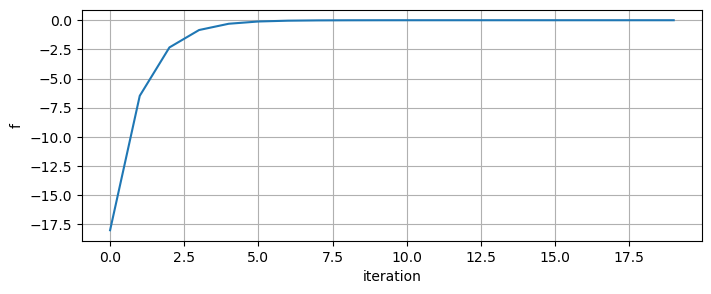

In [6]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize=(8,3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

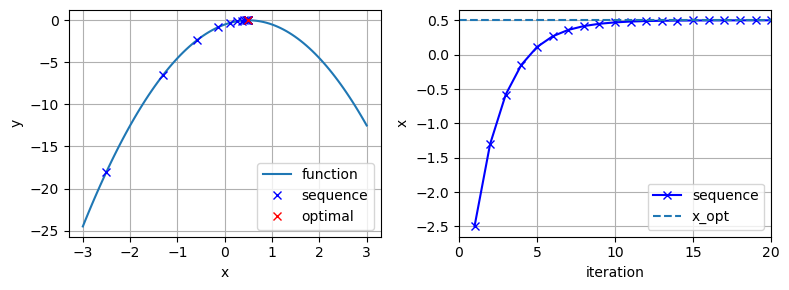

In [7]:
fig, axes = subplots(1,2,figsize=(8,3))

# 関数のプロット
axes[1].plot(xs, f.(xs), label="function")

# 探索の過程
axes[1].plot(x_seq, f.(x_seq), "bx", label="sequence")

# 最適値
axes[1].plot(x_opt, f(x_opt), "rx", label="optimal")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].legend()

# 探索の過程をステップごとにプロット
axes[2].plot(1:maxiter, x_seq, "bx-", label="sequence")
axes[2].hlines(x_opt, 0, maxiter, ls="--", label="x_opt")
axes[2].set_xlim([0, maxiter])
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x")
axes[2].grid()
axes[2].legend()

tight_layout()